In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor

Importando os dados e removendo coluna de id e coluna sem nome

In [3]:
df_bts = pd.read_csv('../../input_data/02_pre_processed_files/bts.csv')
df_test_alunos = pd.read_csv('../../input_data/02_pre_processed_files/meds_test_alunos.csv')
df_train_alunos = pd.read_csv('../../input_data/02_pre_processed_files/meds_train_alunos.csv')
df_test_alunos = df_test_alunos.drop(columns=['ponto_id'])
df_train_alunos = df_train_alunos.drop(columns=['ponto_id'])

In [4]:
df_train_alunos = df_train_alunos.loc[:, ~df_train_alunos.columns.str.contains('^Unnamed')]
df_train_alunos

,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.0000,5.0,3.0,2.0,-8.055786,-34.951505,True
1,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
2,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.0000,5.0,3.0,2.0,-8.055506,-34.951693,True
3,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.050390,-34.959630,False
4,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-93.005000,-97.114286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6759,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-87.315000,-88.735714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6760,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-95.165000,-90.705714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6761,-109.088333,-107.200000,-107.010000,-108.430000,-97.200000,-98.148571,-99.840000,-94.665000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True


In [5]:
df_test_alunos = df_test_alunos.loc[:, ~df_test_alunos.columns.str.contains('^Unnamed')]
df_test_alunos

,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3
0,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0
1,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0
2,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-86.090000,-115.0000,5.0,3.0,2.0
3,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0
4,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2899,-78.377143,-93.530000,-74.481429,-89.900000,-94.2075,-85.220000,-89.576667,-103.704000,-97.2200,1.0,4.0,4.0
2900,-79.580000,-84.140000,-74.481429,-95.280000,-94.1450,-93.030000,-89.576667,-103.704000,-97.5000,1.0,4.0,4.0
2901,-77.652857,-101.310000,-79.640000,-93.238333,-99.8000,-93.584286,-86.680000,-103.704000,-96.3650,1.0,4.0,4.0
2902,-77.367143,-89.474286,-79.270000,-97.160000,-98.4800,-94.844286,-87.783333,-103.704000,-94.3275,1.0,4.0,5.0


In [6]:
df_bts = df_bts.loc[:, ~df_bts.columns.str.contains('^Unnamed')]
df_bts

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,RssiId
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952000,873,0,rssi_1_1
1,1,BTS_1_2,PEMDL01_2,-8.04342,-34.952000,872,120,rssi_1_2
2,1,BTS_1_3,PEMDL01_3,-8.04342,-34.952000,875,240,rssi_1_3
3,2,BTS_2_1,PEMDL08_1,-8.05289,-34.944672,865,0,rssi_2_1
4,2,BTS_2_2,PEMDL08_2,-8.05289,-34.944672,874,120,rssi_2_2
5,2,BTS_2_3,PEMDL08_3,-8.05289,-34.944672,871,240,rssi_2_3
6,3,BTS_3_1,PEMDL09_1,-8.05532,-34.957900,877,0,rssi_3_1
7,3,BTS_3_2,PEMDL09_2,-8.05532,-34.957900,881,120,rssi_3_2
8,3,BTS_3_3,PEMDL09_3,-8.05532,-34.957900,869,240,rssi_3_3


In [7]:
model = RandomForestRegressor()

Separando features e features alvo

In [8]:
X = df_train_alunos.drop(columns=['lat', 'lon', 'indoor'])
y = df_train_alunos[['lat', 'lon', 'indoor']]

Separação de treino e validação

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Treinando o modelo

In [10]:
model.fit(X_train, y_train)

RandomForestRegressor()

Realizando predição

In [11]:
y_pred = model.predict(X_val)

Avaliando o modelo

In [12]:
model.score(X_val, y_val)

0.9980658399081898

In [13]:
y_indoors_pred = y_pred[:,2]

print("Indoors/Outdoors Accuracy:", accuracy_score(y_val['indoor'], y_indoors_pred == 1))

Indoors/Outdoors Accuracy: 1.0


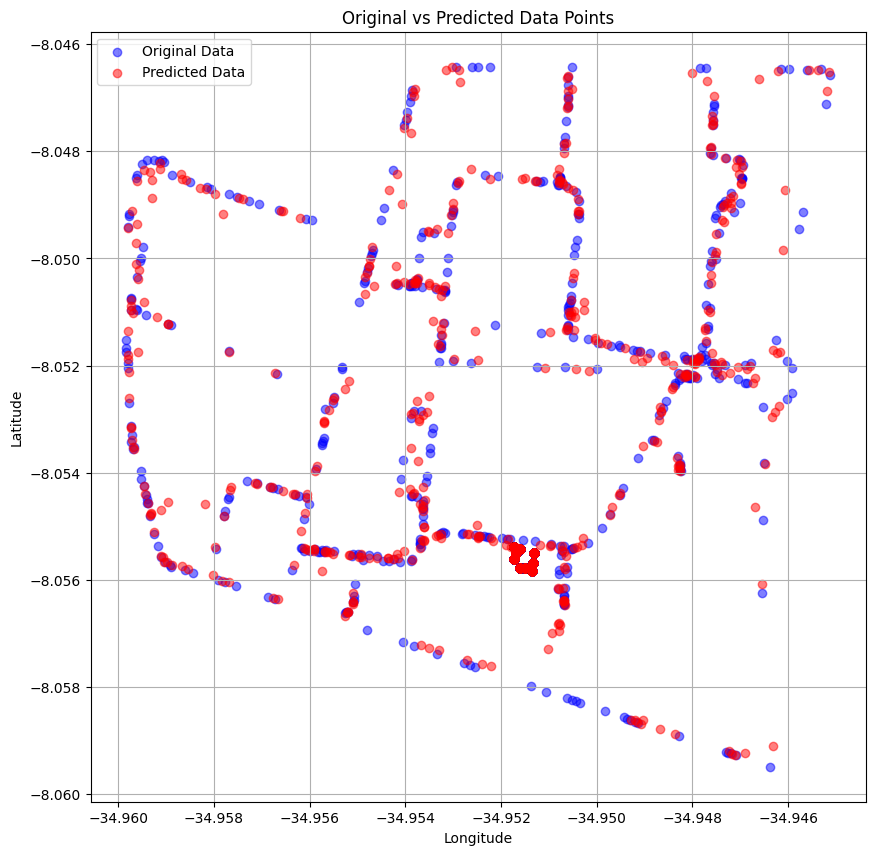

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(y_val['lon'], y_val['lat'], color='blue', label='Original Data', alpha=0.5)

plt.scatter(y_pred[:,1], y_pred[:,0], color='red', label='Predicted Data', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Original vs Predicted Data Points')
plt.legend()
plt.grid(True)
plt.show()

Método de distância real entre pontos no mapa

In [15]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371000
    return c * r

In [16]:
distances = haversine(y_val['lat'], y_val['lon'], y_pred[:,0], y_pred[:,1])

Calculos de distância

In [17]:
mean_distance = np.mean(distances)
max_distance = np.max(distances)
min_distance = np.min(distances)
std_distance = np.std(distances)

print(f"Mean Distance: {mean_distance:.2f} meters")
print(f"Max Distance: {max_distance:.2f} meters")
print(f"Min Distance: {min_distance:.2f} meters")
print(f"Standard Deviation of Distance: {std_distance:.2f} meters")
distances.describe()

Mean Distance: 6.78 meters
Max Distance: 236.81 meters
Min Distance: 0.00 meters
Standard Deviation of Distance: 18.68 meters


count    1.353000e+03
mean     6.782347e+00
std      1.868873e+01
min      1.400687e-09
25%      5.647223e-09
50%      1.057783e-08
75%      5.125841e+00
max      2.368103e+02
dtype: float64

Distribuição das distâncias

<Axes: >

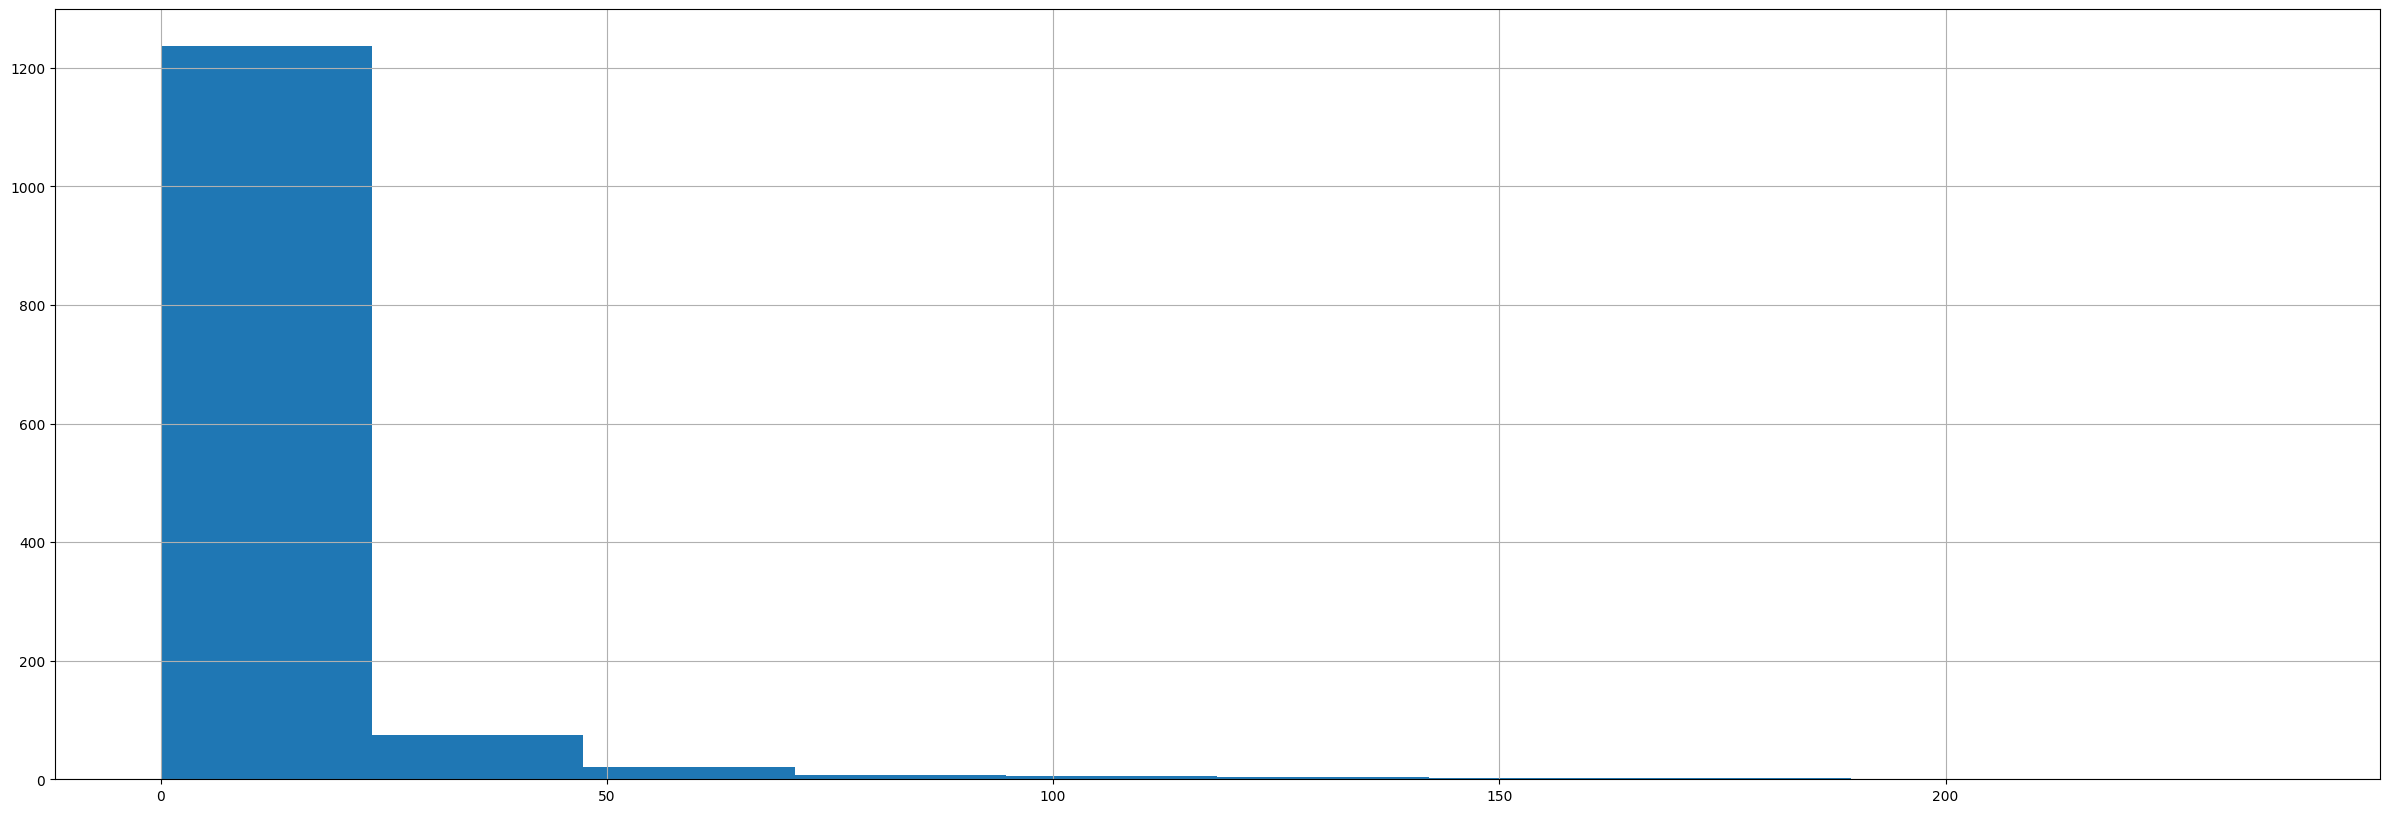

In [18]:
distances.hist(bins=10, figsize=(30,10))

<Axes: >

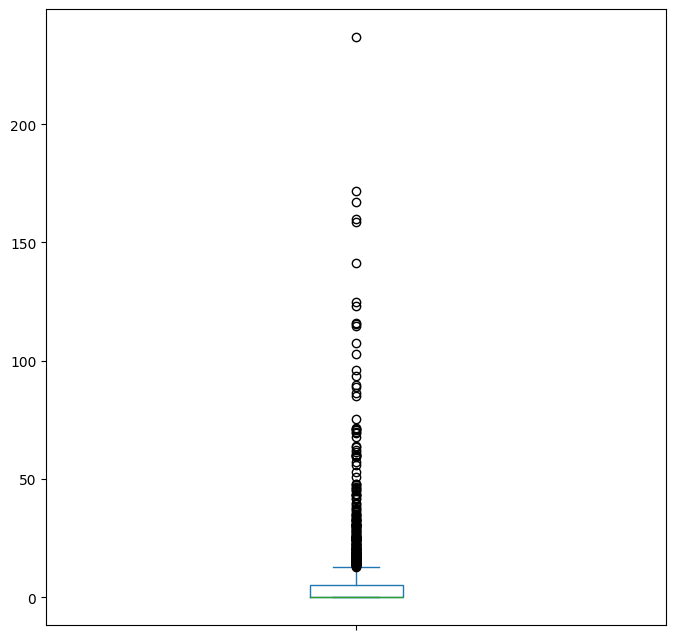

In [19]:
distances.plot(kind='box', figsize=(8,8))

Predições com o modelo de teste

In [20]:
X_test = df_test_alunos

In [21]:
y_test_pred = model.predict(X_test)

In [22]:
lat_test_pred = y_test_pred[:, 0]
lon_test_pred = y_test_pred[:, 1]
indoor_test_pred = y_test_pred[:, 2]

In [23]:
df_test_alunos['lat_pred'] = lat_test_pred
df_test_alunos['lon_pred'] = lon_test_pred
df_test_alunos['indoor_pred'] = indoor_test_pred
df_test_alunos

,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat_pred,lon_pred,indoor_pred
0,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0,-8.055605,-34.951728,1.0
1,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0,-8.055605,-34.951728,1.0
2,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-86.090000,-115.0000,5.0,3.0,2.0,-8.055605,-34.951728,1.0
3,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0,-8.055605,-34.951728,1.0
4,-115.000000,-115.000000,-115.000000,-115.000000,-115.0000,-115.000000,-90.930000,-84.113333,-115.0000,5.0,3.0,2.0,-8.055605,-34.951728,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,-78.377143,-93.530000,-74.481429,-89.900000,-94.2075,-85.220000,-89.576667,-103.704000,-97.2200,1.0,4.0,4.0,-8.046703,-34.952852,0.0
2900,-79.580000,-84.140000,-74.481429,-95.280000,-94.1450,-93.030000,-89.576667,-103.704000,-97.5000,1.0,4.0,4.0,-8.046627,-34.952529,0.0
2901,-77.652857,-101.310000,-79.640000,-93.238333,-99.8000,-93.584286,-86.680000,-103.704000,-96.3650,1.0,4.0,4.0,-8.046565,-34.953109,0.0
2902,-77.367143,-89.474286,-79.270000,-97.160000,-98.4800,-94.844286,-87.783333,-103.704000,-94.3275,1.0,4.0,5.0,-8.046483,-34.951717,0.0


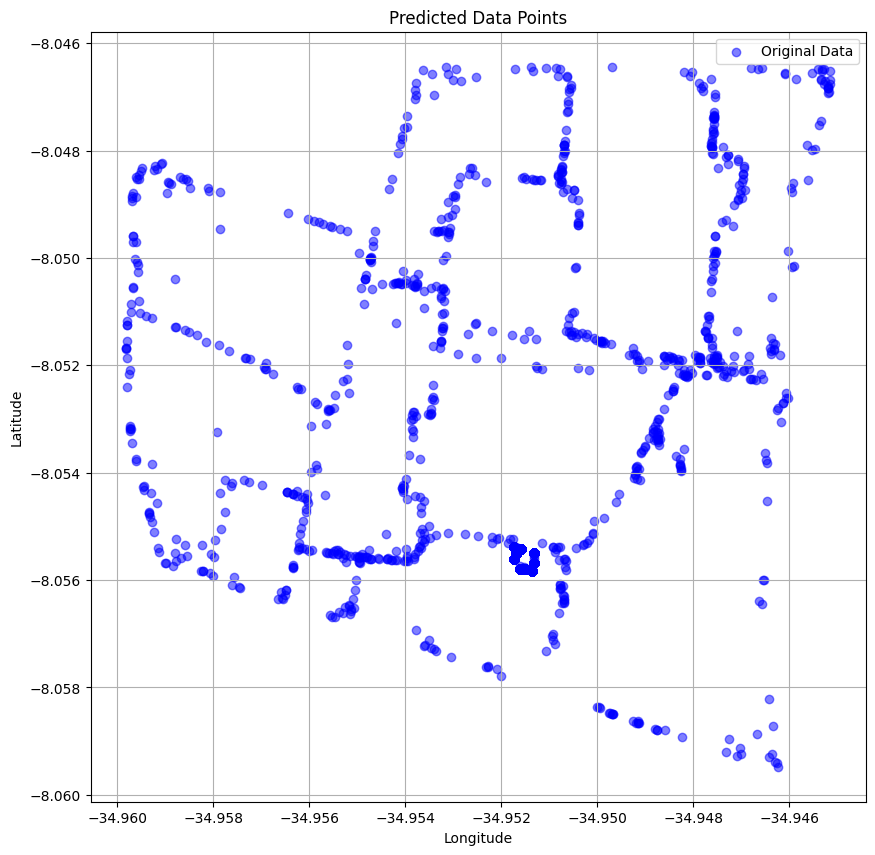

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(lon_test_pred, lat_test_pred, color='blue', label='Original Data', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Data Points')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
norm = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
df_test_alunos['delay_1_norm'] = norm(df_test_alunos['delay_1'])
df_test_alunos['delay_2_norm'] = norm(df_test_alunos['delay_2'])
df_test_alunos['delay_3_norm'] = norm(df_test_alunos['delay_3'])
df_test_alunos['color'] = df_test_alunos.apply(lambda row: (row['delay_1_norm'], row['delay_2_norm'], row['delay_3_norm']), axis=1)

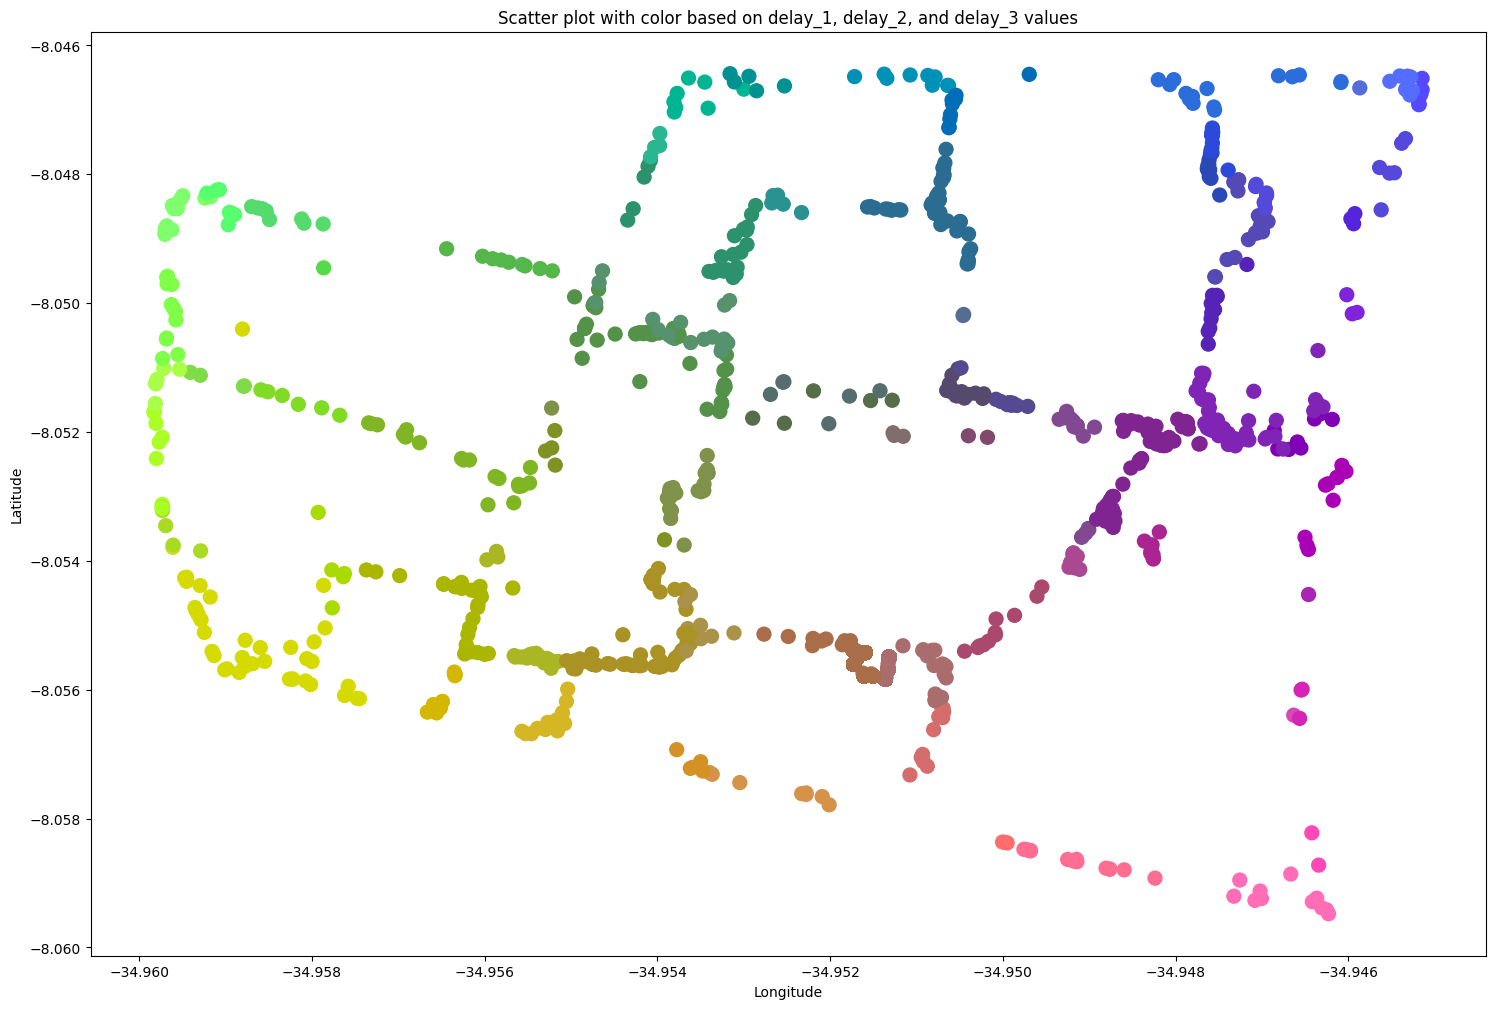

In [26]:
plt.scatter(df_test_alunos['lon_pred'], df_test_alunos['lat_pred'], color= df_test_alunos['color'], s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot with color based on delay_1, delay_2, and delay_3 values')

plt.gcf().set_size_inches((18,12))
plt.show()

In [28]:
df_result = df_test_alunos[['lat_pred','lon_pred','indoor_pred']]

In [29]:
df_result.to_csv('../../output_data/Resultados_Equipe8_Metodorandomforest.csv')